In [1053]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [1054]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,59,70,75,82,114,147,177,212,272,322.0
1,NaN,Japan,2,1,2,2,4,4,7,7,...,639,639,701,773,839,825,878,889,924,963.0
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,178,178,200,212,226,243,266,313,345,385.0
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,149,149,197,238,428,566,673,790,900,1030.0
5,British Columbia,Canada,0,0,0,0,0,0,1,1,...,39,46,64,64,73,103,103,186,231,271.0
6,New South Wales,Australia,0,0,0,0,3,4,4,4,...,65,65,92,112,134,171,210,267,307,353.0
7,Victoria,Australia,0,0,0,0,1,1,1,1,...,21,21,36,49,57,71,94,121,121,121.0
8,Queensland,Australia,0,0,0,0,0,0,0,1,...,20,20,35,46,61,68,78,94,144,184.0
9,NaN,Cambodia,0,0,0,0,0,1,1,1,...,3,3,5,7,7,7,33,35,37,51.0


In [1055]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>4000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
df

,Canada,China,France,Germany,Iran,Italy,Japan,"Korea, South",Spain,Switzerland,US,United Kingdom
date,,,,,,,,,,,,
2020-01-22,0.0,548.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
2020-01-23,0.0,643.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2020-01-24,0.0,920.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0
2020-01-25,0.0,1406.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0
2020-01-26,1.0,2075.0,3.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,5.0,0.0
2020-01-27,1.0,2877.0,3.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,0.0
2020-01-28,2.0,5509.0,4.0,4.0,0.0,0.0,7.0,4.0,0.0,0.0,5.0,0.0
2020-01-29,2.0,6087.0,5.0,4.0,0.0,0.0,7.0,4.0,0.0,0.0,5.0,0.0
2020-01-30,2.0,8141.0,5.0,4.0,0.0,0.0,11.0,4.0,0.0,0.0,5.0,0.0


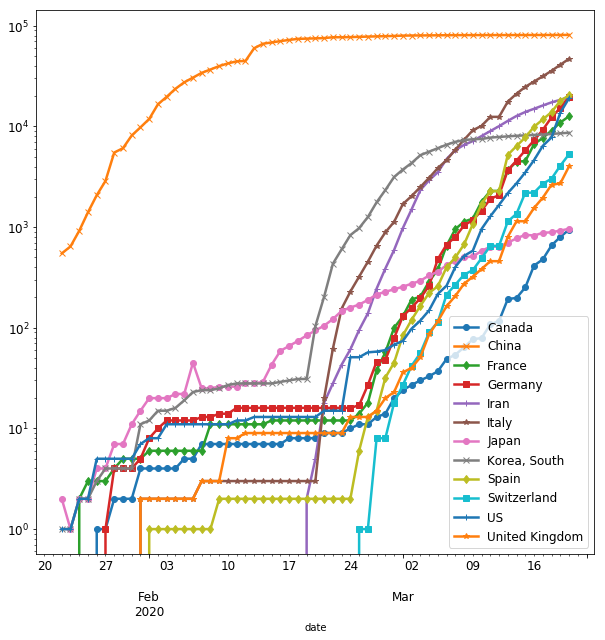

In [1056]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
def plotdataframe(df, logy=False, legend=True):
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    for c,m in zip(df,markers):
        df[c].plot(logy=logy, marker=m, fontsize=12,ax=ax, linewidth=2.5)
    
    font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
    legend and ax.legend(prop=font)

    return ax

plotdataframe(df, logy=True)

In [1057]:
# Shift all the series
maxDate = max(df.index)
threshold = 200
for c in df.columns:
    for i,a in enumerate(df[c]):        
        if i==0 and a>threshold:
            df[c]=df[c].shift(4) # hack to push out china
            break
        if a>=100:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
del df['China']
df

,Canada,France,Germany,Iran,Italy,Japan,"Korea, South",Spain,Switzerland,US,United Kingdom
0,108.0,100.0,130.0,139.0,155.0,105.0,104.0,120.0,114.0,118.0,116.0
1,117.0,130.0,159.0,245.0,229.0,122.0,204.0,165.0,214.0,149.0,164.0
2,193.0,191.0,196.0,388.0,322.0,147.0,433.0,222.0,268.0,217.0,207.0
3,198.0,204.0,262.0,593.0,453.0,159.0,602.0,259.0,337.0,262.0,274.0
4,252.0,288.0,482.0,978.0,655.0,170.0,833.0,400.0,374.0,402.0,322.0
5,415.0,380.0,670.0,1501.0,888.0,189.0,977.0,500.0,491.0,518.0,384.0
6,478.0,656.0,799.0,2336.0,1128.0,214.0,1261.0,673.0,652.0,583.0,459.0
7,657.0,957.0,1040.0,2922.0,1694.0,228.0,1766.0,1073.0,652.0,959.0,459.0
8,800.0,1134.0,1176.0,3513.0,2036.0,241.0,2337.0,1695.0,1139.0,1281.0,802.0
9,943.0,1217.0,1457.0,4747.0,2502.0,256.0,3150.0,2277.0,1359.0,1663.0,1144.0


Text(0.97,0.02,'Code: https://github.com/simra/COVID-19')

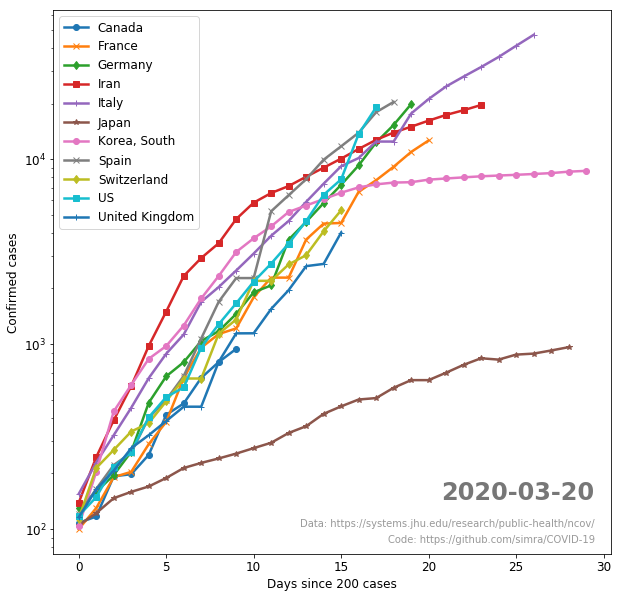

In [1058]:
ax=plotdataframe(df, logy=True)
ax.set_xlabel('Days since {} cases'.format(threshold), size=12)
ax.set_ylabel('Confirmed cases', size=12)
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

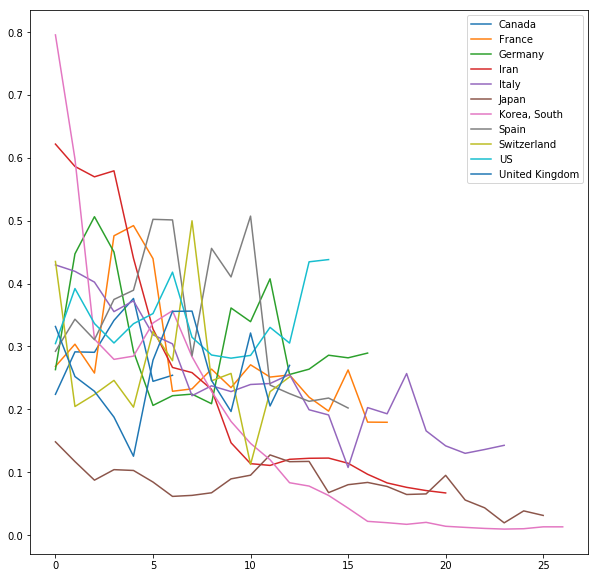

In [1059]:
from math import pow
growth = {}
gdf = df
for c in gdf.columns:
    growth[c]=[]
    for i in range(3,len(gdf[c])):        
        if not np.isnan(gdf[c][i] and gdf[c][i]>2000):                          
            growth[c].append(pow(gdf[c][i]/gdf[c][i-3],1.0/3)-1.0)

fig,ax = plt.subplots()
for c in growth:
    ax.plot(growth[c])
ax.legend(growth.keys())

In [1060]:
# US and Canada 
df=raw
# temporarily drop 03/14
#del df[df.columns[-1]]
df = df[df['Country/Region'].isin(['Canada','US','Italy'])]

df=df.groupby('Country/Region').sum()


df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)


del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Canada,Italy,US
date,,,
2020-01-22,0.0,0.0,1.0
2020-01-23,0.0,0.0,1.0
2020-01-24,0.0,0.0,2.0
2020-01-25,0.0,0.0,2.0
2020-01-26,1.0,0.0,5.0
2020-01-27,1.0,0.0,5.0
2020-01-28,2.0,0.0,5.0
2020-01-29,2.0,0.0,5.0
2020-01-30,2.0,0.0,5.0


In [1061]:
#https://stackoverflow.com/questions/54376900/fit-sigmoid-curve-in-python

from scipy.optimize import curve_fit
import numpy as np
from scipy.optimize import differential_evolution
import warnings

yData = df['US']
xData = range(len(yData))

def sigmoid(x, amplitude, x0, k):
    return amplitude**2/(1.0+np.exp(-(x-k)/x0))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = sigmoid(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minY**2, maxY**2]) # search bounds for amplitude
    parameterBounds.append([1.0/maxX, 1e6]) # search bounds for x0
    parameterBounds.append([minX, maxX]) # search bounds for k

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x, np.array(parameterBounds).T

# by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters, bounds = generate_Initial_Parameters()
print(geneticParameters)
# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
popt, pcov = curve_fit(sigmoid, xData, yData, geneticParameters, bounds=[[0,0,0],[np.inf,np.inf,np.inf]],maxfev=10000)
sigma = np.sqrt(np.diag(pcov)) 
print('Fitted parameters: {} Cov: {} Sigma: {}'.format(popt, pcov,sigma))
print()

modelPredictions = sigmoid(xData, *popt) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

xModel = np.linspace(min(xData), min(xData)+90)



[4.76616948e+01 9.25663056e+04 3.14648852e+01]
Fitted parameters: [1.12972374e+05 2.87623891e+00 9.66299069e+01] Cov: [[2.28576614e+19 8.59189427e+08 1.16391031e+15]
 [8.59189427e+08 3.58826429e-02 4.37499070e+04]
 [1.16391031e+15 4.37499070e+04 5.92662208e+10]] Sigma: [4.78096866e+09 1.89427144e-01 2.43446546e+05]


RMSE: 263.36394858387814
R-squared: 0.993768712916683


In [1062]:
# estimate the uncertainty range of the parameters.
L=np.linalg.cholesky(pcov).T
print(popt)
print(L)
eps = 1
[popt-L.dot([eps,0,0]),
 popt+L.dot([eps,0,0]),
 popt-L.dot([0,eps,0]),
 popt+L.dot([0,eps,0]),
 popt-L.dot([0,0,eps]),
 popt+L.dot([0,0,eps])]

# note we use epsilon = 0.5 instead of 1 stanard deviation. 
# The true distribution is asymmetric and heavy-tailed, so we end up with bad estimates for the amplitude.

[1.12972374e+05 2.87623891e+00 9.66299069e+01]
[[4.78096866e+09 1.79710324e-01 2.43446546e+05]
 [0.00000000e+00 5.98902530e-02 8.25099324e-01]
 [0.00000000e+00 0.00000000e+00 2.88268827e-02]]


[array([-4.78085569e+09,  2.87623891e+00,  9.66299069e+01]),
 array([4.78108164e+09, 2.87623891e+00, 9.66299069e+01]),
 array([1.12972194e+05, 2.81634865e+00, 9.66299069e+01]),
 array([1.12972553e+05, 2.93612916e+00, 9.66299069e+01]),
 array([-1.30474173e+05,  2.05113958e+00,  9.66010800e+01]),
 array([3.56418920e+05, 3.70133823e+00, 9.66587338e+01])]

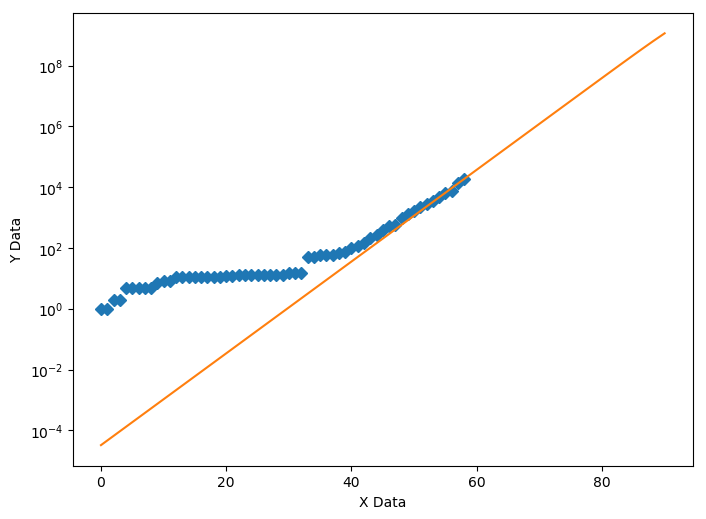

In [1063]:
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot    
    yModel = sigmoid(xModel, *popt)

    # now the model as a line plot
    axes.plot(xModel, yModel)
    axes.set_yscale('log')
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

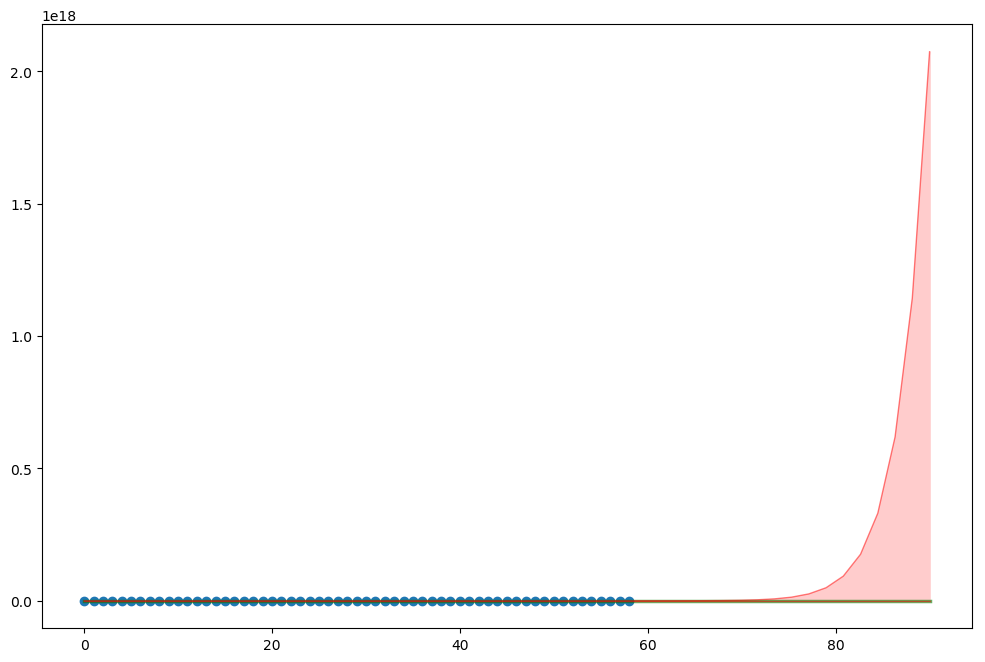

In [1064]:
# Plot the best fit sigmoid and uncertainty region.

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
curveFit = sigmoid(xData,*popt)
curveFitModel = sigmoid(xModel,*popt)
plt.plot(xData, yData, 'o')
plt.hold(True)
plt.plot(xModel, curveFitModel, 
    linewidth=2.5, 
    color = 'green',
    alpha = 0.6) #,
    #label = fitEquation)

maxes = None
mins = None

for p in [ [0,eps,0], [eps,0,0], [0,0,eps]]:
    params = popt+L.dot(p)
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    if maxes is None:
        maxes = s
    if mins is None:
        mins =s
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)
    #print(maxes,mins)
    params = popt-L.dot(p)
    #params[0] = max(params[0],max(yData))   # fudge in case the amplitude is negative. 
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)

plt.plot(xModel, maxes, linewidth= 1.0, alpha = 0.5, color='red')
plt.plot(xModel, mins, linewidth= 1.0, alpha = 0.5, color='red')
    
plt.fill_between(xModel, mins, maxes, color='#FFcccc')
#ax.set_yscale('log')
#plt.plot(xModel, sigmoid(xModel,lower[0], lower[1], lower[2] ), #curveFitModel-fitError, 
#    linewidth = 1.0, 
#    alpha = 0.5, 
#    color = 'red')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
#plt.text(3.2, 1.0, 
#    ("$\mathrm{curve fit\;\;values:\;}$\n a = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f \n c = %.3f\t $\pm$ %.3f" 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
#xlabel(r'\textrm{time (s)}', fontsize=24)
#ylabel(r'\textrm{temperature (K)}',fontsize=24)
#plt.title(r"Exponential fit with $\pm 1\sigma$ and $\pm 3\sigma$ fit errors",
#      fontsize=28, color='k')
#ax.legend(fontsize=18)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.savefig('3sigmaPlot.pdf', figsize=(6,4), dpi=600)
#plt.show()

[[19, 20, 20, 20, 20, 21], [11, 11, 11, 11, 12, 11, 11, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 8, 7, 7]]


Text(0,0.5,'Country reached X cases Y days after Italy')

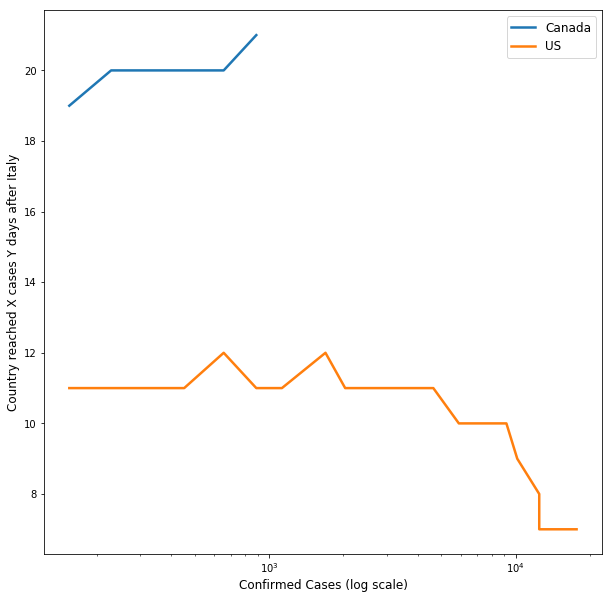

In [1065]:
deltas = [[],[]]
vals = []
for i,v in enumerate(df['Italy']):
    if v<100:
        continue
    vals.append(v)
    for j,v2 in enumerate(df['Canada']):            
        if v2>=v:
            deltas[0].append(j-i)
            break
    for j,v2 in enumerate(df['US']):
        if v2>=v:
            deltas[1].append(j-i)
            break
print(deltas)
fig, ax = plt.subplots()
#ax.plot(zip(vals,deltas[0]))

ax.plot(vals[:len(deltas[0])],deltas[0], linewidth=2.5)
ax.plot(vals[:len(deltas[1])],deltas[1], linewidth=2.5)
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
ax.legend(['Canada','US'], prop=font)
ax.set_xscale('log')
ax.set_xlabel('Confirmed Cases (log scale)', size=12)
ax.set_ylabel('Country reached X cases Y days after Italy', size=12)

Text(0,0.5,'Confirmed cases')

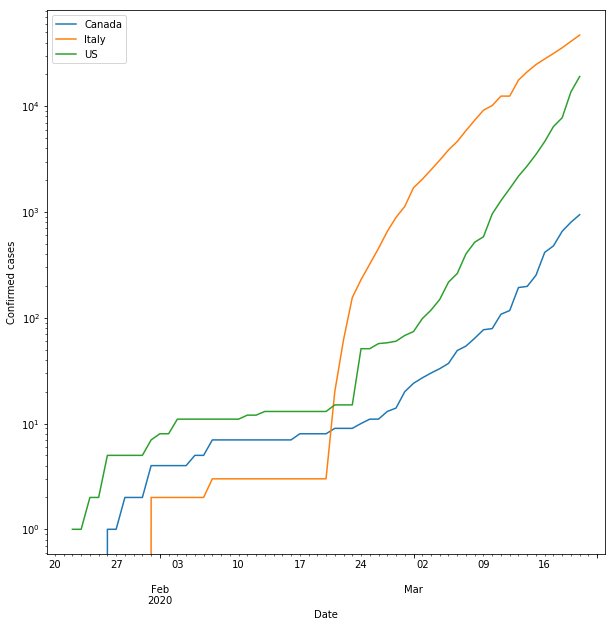

In [1066]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(legend=True,logy=True) #list(df.columns))
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed cases')


In [1067]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Mexico']))]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Mexico
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
2020-01-29,0.0
2020-01-30,0.0
